# Classification. Linear models and KNN

In [3737]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3738]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Part 1: Titanic survival prediction

### Dataset

Read the description here: https://www.kaggle.com/c/titanic/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/titanic/overview/evaluation.  


In [3739]:
PATH = "./data/"

In [3740]:
data_train = pd.read_csv(os.path.join(PATH, 'titanic', 'train.csv')).set_index('PassengerId')
data_test = pd.read_csv(os.path.join(PATH, 'titanic', 'test.csv')).set_index('PassengerId')



In [3741]:
data_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3742]:
df_train = data_train.copy()
df_test = data_test.copy()
df_all = [df_train, df_test]
df_whole = pd.concat([df_train,df_test])

for dataset in df_all:
    print(dataset.shape)

(891, 11)
(418, 10)


In [3743]:
df_whole

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [3744]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

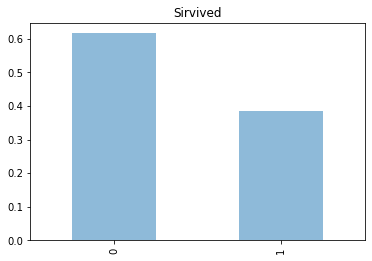

In [3745]:
df_train['Survived'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Sirvived')
plt.show()

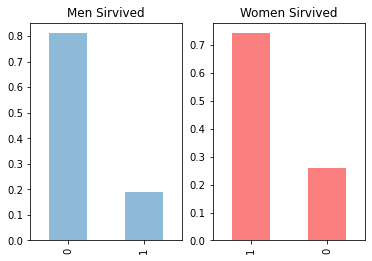

In [3746]:
fem_color = '#FA0000'

plt.subplot2grid((1,2),(0,0))
df_train['Survived'][df_train['Sex']=='male'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Men Sirvived')

plt.subplot2grid((1,2),(0,1))
df_train['Survived'][df_train['Sex']=='female'].value_counts(normalize=True).plot(kind='bar',alpha=0.5, color=fem_color)
plt.title('Women Sirvived')

plt.show()


It is clear that the majority of the survivors were women. Most likely, this is due to the fact that it was women and children who were evacuated first.

**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

At first glance, it seems that the distributions do not differ significantly. It is better illustrated in the following plots:

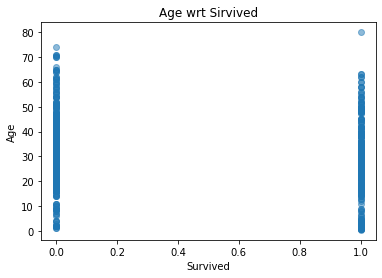

In [3747]:
plt.scatter(df_train['Survived'], df_train['Age'], alpha=0.5)
plt.title('Age wrt Sirvived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

This is because older people could afford a higher class, while younger people mainly traveled in economy class:

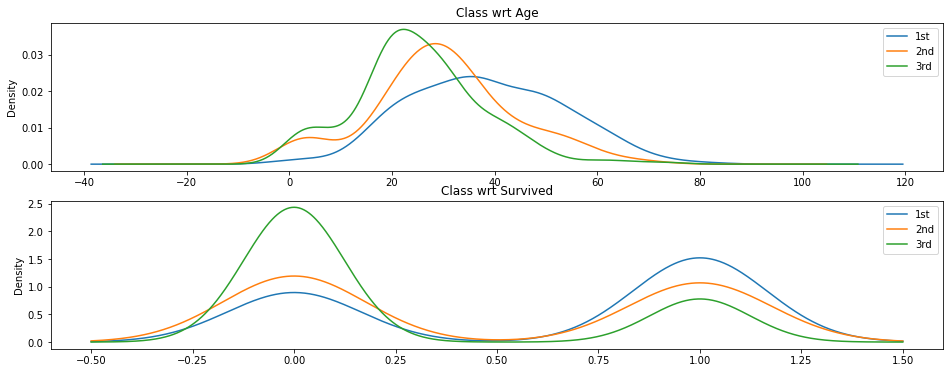

In [3748]:
plt.figure(figsize=(16,6))

plt.subplot2grid((2,2),(0,0), colspan=2)
for i in [1,2,3]:
    df_train['Age'][df_train['Pclass']==i].plot(kind='kde')
plt.legend(('1st','2nd','3rd'))
plt.title('Class wrt Age')

plt.subplot2grid((2,2),(1,0), colspan=2)
for i in [1,2,3]:
    df_train['Survived'][df_train['Pclass']==i].plot(kind='kde')
plt.legend(('1st','2nd','3rd'))
plt.title('Class wrt Survived')
plt.show()

**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


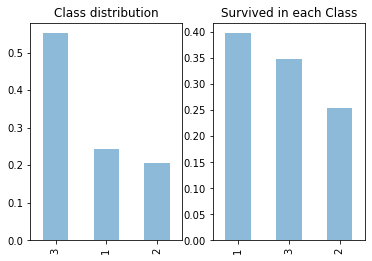

In [3749]:
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))

plt.subplot2grid((1,2),(0,0))
df_train['Pclass'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Class distribution')

plt.subplot2grid((1,2),(0,1))
df_train['Pclass'][df_train['Survived']==1].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Survived in each Class')

plt.show()

In [3750]:
pclass_survived_1 = 136 / (136+80)
pclass_survived_2 = 87 / (97+87)
pclass_survived_3 = 119 / (119+372)
print(f'Relative number of survived passengers of 1st class is {pclass_survived_1:.2f}; of 2d class is {pclass_survived_2:.2f}; of 3d class is {pclass_survived_3:.2f}')


Relative number of survived passengers of 1st class is 0.63; of 2d class is 0.47; of 3d class is 0.24


Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


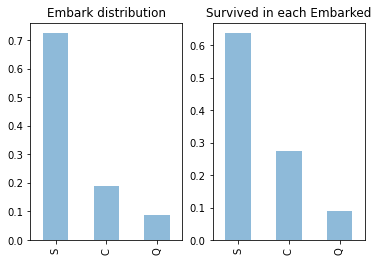

In [3751]:
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

plt.subplot2grid((1,2),(0,0))
df_train['Embarked'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Embark distribution')

plt.subplot2grid((1,2),(0,1))
df_train['Embarked'][df_train['Survived']==1].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Survived in each Embarked')

plt.show()

In [3752]:
embark_survived_S = 217 / (217+427)
embark_survived_C = 93 / (93+75)
embark_survived_Q = 30 / (30+47)

print(f'Relative number of survived passengers of S is {embark_survived_S:.2f}; of C class is {embark_survived_C:.2f}; of Q class is {embark_survived_Q:.2f}')


Relative number of survived passengers of S is 0.34; of C class is 0.55; of Q class is 0.39


Hence, "the safest" class is 1st class (which is not surprising), the most unsafe is 3d class (which is also not surprising). The largest number of survivors from the port S - Southampton.

### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

In [3753]:
## your code
df_train[df_train['Age'].isna() == True].shape[0]
temp1 = [ df_train[df_train[x].isna() == True].shape[0] for x in df_train ]
temp1_ = [x/df_train.shape[0]*100 for x in temp1]
temp1_
nan_feats_perc = dict(zip([x for x in df_train], temp1_))
nan_feats_perc

{'Survived': 0.0,
 'Pclass': 0.0,
 'Name': 0.0,
 'Sex': 0.0,
 'Age': 19.865319865319865,
 'SibSp': 0.0,
 'Parch': 0.0,
 'Ticket': 0.0,
 'Fare': 0.0,
 'Cabin': 77.10437710437711,
 'Embarked': 0.22446689113355783}

Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

There are only a few NaNs in 'Embarked', so we can either throw them out or replace them with the most common value (which is S).
'Age' is skipped in 19% of passengers. Since age has an almost normal distribution, I think it is possible to replace the NaNs with the average for each class.
'Cabin' has too many missing values. So, it cannot be dropped out, they cannot be replaced either, most likely. One can try to create a new feature that will simply show whether there is a cabin or not.

(1.5 points) Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

**(1.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

I will convert all categorical features into integers

In [3754]:
# replace missing values in 'Embarked' with the most frequntly one

freq_port = df_train['Embarked'].dropna().mode()[0]
df_whole['Embarked'] = df_whole['Embarked'].fillna(freq_port)

# replace letters with numbers
df_whole['Embarked'] = df_whole['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [3755]:
# replace missing values with median value
df_whole['Fare'].fillna(df_whole['Fare'].dropna().median(), inplace=True)

In [3756]:
# replace missing values in 'Age' with mean value for 'Sex' and 'Class'

df_age = df_whole[['Pclass','Sex','Age']].copy()
gp_age = df_age.groupby(['Pclass','Sex']).size().reset_index()

for i in range(0,gp_age.shape[0]):
    mean = df_age[(df_age['Pclass'] == gp_age.iloc[i]['Pclass']) & (df_age['Sex'] == gp_age.iloc[i]['Sex'])]['Age'].mean()
    df_whole.loc[(df_whole['Age'].isnull()) & (df_whole['Pclass'] == gp_age.iloc[i]['Pclass'])\
              & (df_whole['Sex'] == gp_age.iloc[i]['Sex']), 'Age'] = mean
        

In [3757]:
# replace 'Sex' with numbers

df_whole['Sex'] = df_whole['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

Let's try to extract information from those features that, at first glance, do not affect at 'Survived'.

In [3758]:
# let's extract the letter from Cabin number

df_whole['CabinLetter'] = df_whole['Cabin'].apply(lambda x: str(x)[0])

print(df_whole['CabinLetter'].value_counts())

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: CabinLetter, dtype: int64


In [3759]:
# we also can replace thes letters with numbers and grouping them

title_mapping = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 7, "n": 7}
df_whole['CabinLetter'] = df_whole['CabinLetter'].map(title_mapping)


In [3760]:
# create new feature 'is Cabin' from 'Cabin'

df_whole['isCabin'] = 0
df_whole.loc[df_whole['Cabin'].notna(), 'isCabin'] = 1

In [3761]:
# also we can try to extract personal titles from 'Name'
# let's process the personal titles from 'Name' the same way as in the 'CabinLetter'
df_whole['Title'] = df_whole['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

df_whole['Title'].value_counts()


Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Dona          1
Sir           1
Mme           1
Capt          1
Lady          1
Jonkheer      1
Countess      1
Don           1
Name: Title, dtype: int64

In [3762]:
df_whole['Title'] = df_whole['Title'].replace(['Dr','Rev','Col','Major','Countess','Sir',\
                                     'Lady', 'Capt','Jonkheer','Don','Dona'], 'Other')
df_whole['Title'] = df_whole['Title'].replace('Mlle', 'Miss')
df_whole['Title'] = df_whole['Title'].replace('Ms', 'Miss')
df_whole['Title'] = df_whole['Title'].replace('Mme', 'Mrs')

df_whole['Title'].value_counts()


Mr        757
Miss      264
Mrs       198
Master     61
Other      29
Name: Title, dtype: int64

In [3763]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
df_whole['Title'] = df_whole['Title'].map(title_mapping)
df_whole['Title'] = df_whole['Title'].fillna(0)

Features 'SibSp' and 'Parch' show whether the person traveled alone or not. Based on them, one can create a feature showing the number of family members, or a binary feature (whether the passenger traveled alone or not).

In [3764]:
df_whole['FamilySize'] = df_whole['SibSp'] + df_whole['Parch'] + 1
df_whole['isAlone'] = 0
df_whole.loc[df_whole['FamilySize'] == 1, 'isAlone'] = 1

It turns out, there are many repeated tickets in 'Ticket'. One can make a feature, the value of which will correspond to the number of the same tickets, for instance.

In [3765]:
tickets = df_whole['Ticket'].value_counts()
tickets_ = tickets[tickets > 1]
print(tickets_)

df_whole['Ticket_'] = 1
for i in range(0,tickets_.shape[0]):
    df_whole.loc[(df_whole['Ticket'] == tickets_.index[i]), 'Ticket_'] = tickets_[i]

CA. 2343        11
CA 2144          8
1601             8
S.O.C. 14879     7
3101295          7
                ..
SC/AH 29037      2
CA 31352         2
19996            2
PC 17585         2
PC 17593         2
Name: Ticket, Length: 216, dtype: int64


Or, most likely, the same tickets belonged to families. Perhaps it makes sense to take out families by last name. In the column 'Name' it is represented as "Last Name, personal title Name".

In [3766]:
df_whole['LastName'] = df_whole['Name'].apply(lambda x: str.split(x, ",")[0])
lastname_grp = df_whole[['Survived','LastName', 'Ticket',
                          'Fare', 'Cabin']].groupby(['LastName'])

for _,grp in lastname_grp:
    if (len(grp) != 1):
        print(grp)

             Survived LastName     Ticket   Fare Cabin
PassengerId                                           
280               1.0   Abbott  C.A. 2673  20.25   NaN
747               0.0   Abbott  C.A. 2673  20.25   NaN
1284              NaN   Abbott  C.A. 2673  20.25   NaN
             Survived  LastName  Ticket  Fare  Cabin
PassengerId                                         
949               NaN  Abelseth  348122  7.65  F G63
1237              NaN  Abelseth  348125  7.65    NaN
             Survived LastName     Ticket  Fare Cabin
PassengerId                                          
309               0.0  Abelson  P/PP 3381  24.0   NaN
875               1.0  Abelson  P/PP 3381  24.0   NaN
             Survived LastName  Ticket  Fare Cabin
PassengerId                                       
856               1.0      Aks  392091  9.35   NaN
1199              NaN      Aks  392091  9.35   NaN
             Survived LastName              Ticket  Fare Cabin
PassengerId                   

652               1.0   Doling  231919  23.0   NaN
             Survived LastName    Ticket      Fare    Cabin
PassengerId                                                
545               0.0  Douglas  PC 17761  106.4250      C86
1076              NaN  Douglas  PC 17558  247.5208  B58 B60
1131              NaN  Douglas  PC 17761  106.4250      C86
             Survived LastName Ticket  Fare Cabin
PassengerId                                      
417               1.0     Drew  28220  32.5   NaN
1086              NaN     Drew  28220  32.5   NaN
1139              NaN     Drew  28220  32.5   NaN
             Survived     LastName    Ticket     Fare Cabin
PassengerId                                                
557               1.0  Duff Gordon     11755  39.6000   A16
600               1.0  Duff Gordon  PC 17485  56.9292   A20
             Survived      LastName         Ticket     Fare Cabin
PassengerId                                                      
867               1.0  Dura

             Survived LastName Ticket     Fare Cabin
PassengerId                                         
177               0.0  Lefebre   4133  25.4667   NaN
230               0.0  Lefebre   4133  25.4667   NaN
410               0.0  Lefebre   4133  25.4667   NaN
486               0.0  Lefebre   4133  25.4667   NaN
1024              NaN  Lefebre   4133  25.4667   NaN
             Survived LastName  Ticket  Fare Cabin
PassengerId                                       
47                0.0   Lennon  370371  15.5   NaN
1165              NaN   Lennon  370371  15.5   NaN
             Survived LastName  Ticket   Fare Cabin
PassengerId                                        
606               0.0  Lindell  349910  15.55   NaN
1251              NaN  Lindell  349910  15.55   NaN
             Survived LastName    Ticket  Fare Cabin
PassengerId                                         
854               1.0    Lines  PC 17592  39.4   D28
1283              NaN    Lines  PC 17592  39.4   D28
     

1134              NaN  Spedden  16966  134.5   E34
             Survived LastName    Ticket      Fare Cabin
PassengerId                                             
32                1.0  Spencer  PC 17569  146.5208   B78
1208              NaN  Spencer  PC 17569  146.5208   B78
             Survived LastName     Ticket  Fare Cabin
PassengerId                                          
495               0.0  Stanley  A/4 45380  8.05   NaN
650               1.0  Stanley   CA. 2314  7.55   NaN
             Survived LastName Ticket     Fare Cabin
PassengerId                                         
992               NaN  Stengel  11778  55.4417  C116
1069              NaN  Stengel  11778  55.4417  C116
             Survived LastName    Ticket      Fare    Cabin
PassengerId                                                
973               NaN   Straus  PC 17483  221.7792  C55 C57
1006              NaN   Straus  PC 17483  221.7792  C55 C57
             Survived LastName  Ticket     Fare Cabin

It can be seen that within the group, for the most part, value of the 'Fare' and 'Ticket' is the same. On can create a 'SurvivalProb' feature that will show the probability of survival based on the survival of the rest in the group. To begin with, we will define 'FamilySurvival' value as follows: 1 - if smn from the family survived; 0 - if smn died. The initial value of 'FamilySurvival' is 0.5, which means no information about survivors.

In [3767]:
df_whole['SurvivalProb'] = 0.5
lastname_name_grpby = df_whole[['Survived','Name','LastName','Fare','Cabin']].groupby(['LastName','Fare'])

for _, grp in lastname_name_grpby:
    if (len(grp) != 1):
        for PassID, row in grp.iterrows():
            smax = grp.drop(PassID)['Survived'].max()
            smin = grp.drop(PassID)['Survived'].min()
            if (smax==1.0): df_whole.loc[PassID, 'SurvivalProb'] = 1
            elif (smin==0.0): df_whole.loc[PassID, 'SurvivalProb'] = 0
        
print("Number of passengers with group survival information: " 
      +str(df_whole[df_whole['SurvivalProb']!=0.5].shape[0]))

Number of passengers with group survival information: 420


Now let's use the ticket information. The same tickets do not always belong only to families (this can be seen from the variable '' that shows last names of people with the same tickets). Most likely, the same tickets indicate that people traveled together, even if they are not relatives. So now, in a similar way, we define 'SurvivalProb' for groups by the same tickets.

In [3768]:
ticket_lastnames = []
for i in range(0,tickets_.shape[0]):
    ticket_lastnames.append(df_whole.loc[(df_whole['Ticket'] == tickets_.index[i])]['LastName'])
ticket_lastnames

[PassengerId
 160     Sage
 181     Sage
 202     Sage
 325     Sage
 793     Sage
 847     Sage
 864     Sage
 1080    Sage
 1234    Sage
 1252    Sage
 1257    Sage
 Name: LastName, dtype: object,
 PassengerId
 60      Goodwin
 72      Goodwin
 387     Goodwin
 481     Goodwin
 679     Goodwin
 684     Goodwin
 1031    Goodwin
 1032    Goodwin
 Name: LastName, dtype: object,
 PassengerId
 75     Bing
 170    Ling
 510    Lang
 644     Foo
 693     Lam
 827     Lam
 839    Chip
 931     Hee
 Name: LastName, dtype: object,
 PassengerId
 73         Hood
 121     Hickman
 386      Davies
 656     Hickman
 666     Hickman
 1104     Deacon
 1244     Dibden
 Name: LastName, dtype: object,
 PassengerId
 51          Panula
 165         Panula
 267         Panula
 639         Panula
 687         Panula
 825         Panula
 1259    Riihivouri
 Name: LastName, dtype: object,
 PassengerId
 14     Andersson
 120    Andersson
 542    Andersson
 543    Andersson
 611    Andersson
 814    Andersson
 

In [3769]:
ticket_grpby = df_whole.groupby('Ticket')

for _, grp in ticket_grpby:
    if (len(grp) > 1):
        for PassID, row in grp.iterrows():
            if (row['SurvivalProb']==0)|(row['SurvivalProb']==0.5):
                smax = grp.drop(PassID)['Survived'].max()
                smin = grp.drop(PassID)['Survived'].min()
                if (smax==1.0): df_whole.loc[PassID, 'SurvivalProb'] = 1
                elif (smin==0.0): df_whole.loc[PassID, 'SurvivalProb'] = 0

print("Number of passengers with group survival information: " 
      +str(df_whole[df_whole['SurvivalProb']!=0.5].shape[0]))

Number of passengers with group survival information: 546


In [3770]:
df_whole['SurvivalProb']

PassengerId
1       0.5
2       0.5
3       0.5
4       0.0
5       0.5
       ... 
1305    0.5
1306    1.0
1307    0.5
1308    0.5
1309    1.0
Name: SurvivalProb, Length: 1309, dtype: float64

As shown earlier, the bulk of the dead are men. So I create another feature that depletes the passenger gender and 'SurvivalProb'. Earlier we redefined the values in 'Sex' as 0 for men and 1 for women. A new feature will simply be a multiplication of 'Sex' and 'SurvivalProb' columns. That is, for men, the probability of survival will tend to zero.

In [3771]:
df_whole['SurvivalProb*Sex'] = (df_whole['SurvivalProb']*df_whole['Sex']).astype(int)

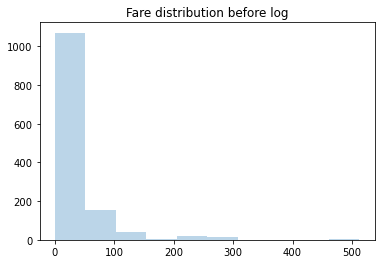

In [3772]:
# but furst let's scale 'Fare', as it's distribution is not normal

plt.hist(df_whole['Fare'], alpha = 0.3)
plt.title('Fare distribution before log')
plt.show()

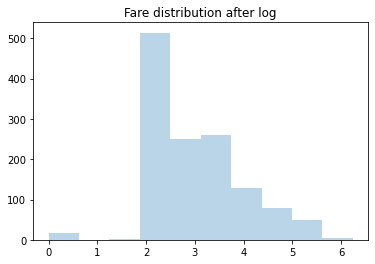

In [3773]:
df_whole['Fare'] = np.log(df_whole['Fare']+1)

plt.hist(df_whole['Fare'], alpha = 0.3)
plt.title('Fare distribution after log')
plt.show()

In [3774]:
# dividing the entire range of values into intervals
df_whole['FareBand'] = pd.qcut(df_whole['Fare'], 6)
df_whole[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 2.172]",0.205128
1,"(2.172, 2.268]",0.190789
2,"(2.268, 2.738]",0.366906
3,"(2.738, 3.296]",0.436242
4,"(3.296, 3.991]",0.435065
5,"(3.991, 6.241]",0.695035


In [3775]:
fb = df_whole['FareBand'].unique().sort_values()
ind = []

for i in range(0, fb.shape[0]):
    ind_ = df_whole.loc[(df_whole['Fare'] > fb[i].left) & (df_whole['Fare'] <= fb[i].right)].index
    ind.append(ind_)

for i in range(0,fb.shape[0]):
    df_whole.loc[ind[i], 'Fare'] = i
    
df_whole['Fare'] = df_whole['Fare'].astype(int)


In [3776]:
# the same processing for 'Age'

df_whole['AgeBand'] = pd.cut(df_whole['Age'], 7)
df_whole[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(0.0902, 11.574]",0.573529
1,"(11.574, 22.979]",0.409756
2,"(22.979, 34.383]",0.315341
3,"(34.383, 45.787]",0.424242
4,"(45.787, 57.191]",0.411765
5,"(57.191, 68.596]",0.346154
6,"(68.596, 80.0]",0.142857


In [3777]:
ab = df_whole['AgeBand'].unique().sort_values(ascending=True)

for i in range(0,ab.shape[0]):
    df_whole.loc[(df_whole['Age'] > ab[i].left) & (df_whole['Age'] <= ab[i].right), 'Age'] = i
    
df_whole['Age'] = df_whole['Age'].astype(int)


In [3778]:
# drop unnecessary features
df_whole = df_whole.drop(['Name','Ticket','Cabin','FareBand','AgeBand','LastName'], axis=1)

In [3779]:
print('final dataset:')
df_whole

final dataset:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter,isCabin,Title,FamilySize,isAlone,Ticket_,SurvivalProb,SurvivalProb*Sex
PassengerId,,,,,,,,,,,,,,,,
1,0.0,3,0,1,1,0,0,0,7,0,1,2,0,1,0.5,0
2,1.0,1,1,3,1,0,5,1,3,1,3,2,0,2,0.5,0
3,1.0,3,1,2,0,0,1,0,7,0,2,1,1,1,0.5,0
4,1.0,1,1,3,1,0,4,0,3,1,3,2,0,2,0.0,0
5,0.0,3,0,3,0,0,1,0,7,0,1,1,1,1,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,0,2,0,0,1,0,7,0,1,1,1,1,0.5,0
1306,NaN,1,1,3,0,0,5,1,3,1,5,1,1,3,1.0,1
1307,NaN,3,0,3,0,0,0,0,7,0,1,1,1,1,0.5,0


Let's look at score of simple models!

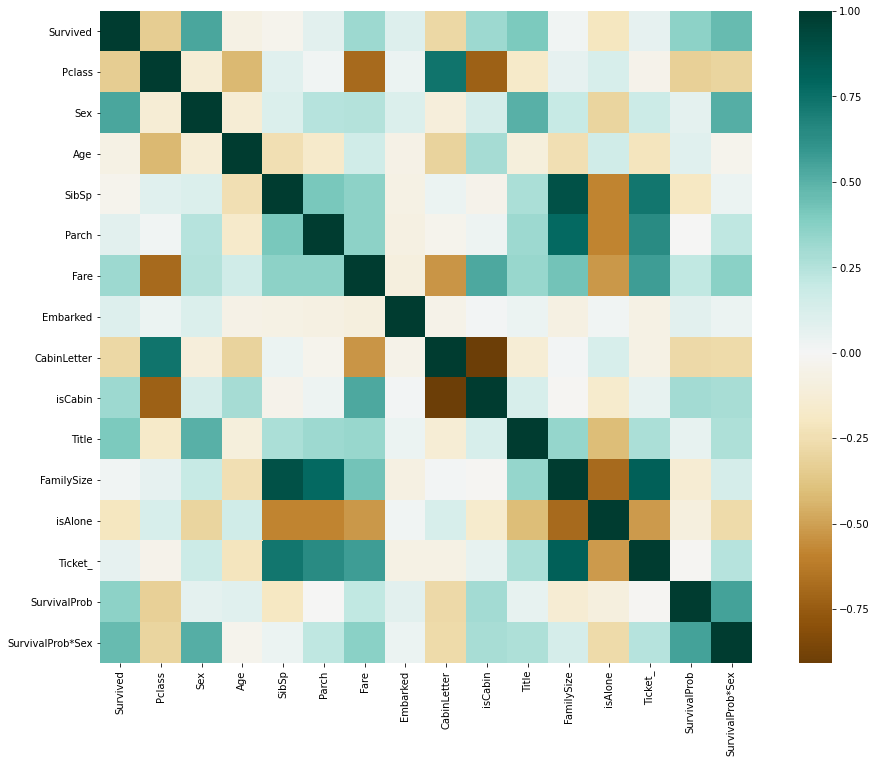

In [3780]:
plt.figure(figsize=(17,12))
sns.heatmap(df_whole[:df_train.shape[0]].corr(method='pearson'), center=0, square=True, cmap="BrBG")
plt.show()


As we can see, there is a high collinearity among the following pairs of features: 'isCabin'/'Pclass'; 'SibSp'/'Family Size'; 'isCabin'/'CabinLetter'; 'Ticket-'/'FamilySize'. This must be taken into account when building a model.

'Sex', 'Fare', 'isCabin', 'Title' have the greatest influence on 'Survived'.

In [3781]:
df_whole_ = df_whole.drop(['Survived','CabinLetter','FamilySize'], axis=1)
X_train = df_whole_[:df_train.shape[0]]
y_train = df_train['Survived']
X_test  = df_whole_[df_train.shape[0]:]
cv_ = 5

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)

X_train shape (891, 13)
y_train shape (891,)
X_test shape (418, 13)


In [3782]:
lr = LogisticRegression(max_iter = 2000, random_state=42)
lr_cv = cross_val_score(lr,X_train,y_train,cv=cv_)
print(f'LR cross_cal_score: {lr_cv.mean()}')

LR cross_cal_score: 0.8350072186303434


In [3783]:
knn = KNeighborsClassifier()
knn_cv = cross_val_score(knn,X_train,y_train,cv=cv_)
print(f'kNN cross_cal_score: {knn_cv.mean()}')

kNN cross_cal_score: 0.8125666938673028


The first score is not that bad. Let's try to choose the best model for each classifier to improve the score.

**(0.5 + X points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).
(https://scikit-learn.org/stable/modules/grid_search.html#grid-search)

In [3784]:
# empirically selected features that give the best score on the test sample
features = ['Pclass','Sex','Age','Title','isCabin','Ticket_','SurvivalProb','SurvivalProb*Sex']

X_train = df_whole[:df_train.shape[0]][features]
y_train = df_train['Survived']
X_test  = df_whole[df_train.shape[0]:][features]
cv_ = 5

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)


X_train shape (891, 8)
y_train shape (891,)
X_test shape (418, 8)


In order not to manually iterate over various parameters of the models, let's use the function GridSearchCV (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [3785]:
from sklearn.model_selection import GridSearchCV 

In [3786]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}
clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = cv_, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)

print('LR best score: ', best_clf_lr.best_score_)
print('LR best parameters: ', best_clf_lr.best_params_)

best_lr = best_clf_lr.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
LR best score:  0.8484715334881676
LR best parameters:  {'C': 0.08858667904100823, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [3787]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = cv_, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)

print('kNN best score: ', best_clf_knn.best_score_)
print('kNN best parameters: ', best_clf_knn.best_params_)

best_knn = best_clf_knn.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
kNN best score:  0.8293704098926622
kNN best parameters:  {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


We have two good models. So one can try to combine them using the function VotingClassifier (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier).  /n

"The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote (hard vote) or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses."

In [3788]:
from sklearn.ensemble import VotingClassifier

voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('lr', best_lr)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('lr', best_lr)], voting = 'soft')
voting_clf_hard_score = cross_val_score(voting_clf_hard,X_train,y_train,cv=cv_).mean()
voting_clf_soft_score = cross_val_score(voting_clf_soft,X_train,y_train,cv=cv_).mean()

print('voting_clf_hard mean :',voting_clf_hard_score)
print('voting_clf_soft mean :',voting_clf_soft_score)

voting_clf_hard mean : 0.8450881928315862
voting_clf_soft mean : 0.8338710689849979


Actually, these scores is comparable to the scores of the models separately.

Load the test set and make the predictions. Submit them to kaggle and see the results :)
Select the best model, load the test set and make the predictions. Submit them to kaggle.

**Note**. X points will depend on your kaggle leaderboard score.
$$ f(score) = 0.5, \ \ 0.76 \leq score < 0.78,$$
$$ f(score) = 1.0, \ \ 0.78 \leq score < 0.81,$$ 
$$ f(score) = 2.5, \ \ 0.81 \leq score $$ 
Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.

## Score on Kaggle:
###### LogisticRegression  ->  0.81339
###### kNearestNeighbors  ->  0.77272
###### Soft Voting  ->  0.79425
###### Hard Voting  ->  0.811004

The highest score obtained with a Hard Voting. Screenshots are located in the same repository. #495 on leaderboard. (MokryYezhik)

Let's compare scores on train and test sets:

In [3789]:
scores = [[best_clf_lr.best_score_, 0.813399],
         [best_clf_knn.best_score_, 0.77272],
         [voting_clf_soft_score, 0.79425],
         [voting_clf_hard_score, 0.81104]]
df_scores = pd.DataFrame(data=scores,index=['LR','kNN','sof Vot','hard Vot'],columns=['train set','test set'])
df_scores

,train set,test set
LR,0.848472,0.813399
kNN,0.829370,0.772720
sof Vot,0.833871,0.794250
hard Vot,0.845088,0.811040


There are the weights of the features in LR below. The 'Sex', 'SurvivalProb' and 'SurvivalProb*Sex' has the biggest influence. 'Ticket_' has the smallest weight, close to zero, but if it's removed from the features list, the model performs worse.

In [3790]:
best_lr.coef_
df_weights = pd.DataFrame(data=list(zip(features,best_lr.coef_.ravel())), columns=['Feature', 'Weight']).set_index('Feature')
df_weights

,Weight
Feature,
Pclass,-0.697350
Sex,1.473343
Age,-0.340657
Title,0.481663
isCabin,0.446125
Ticket_,-0.163011
SurvivalProb,1.101591
SurvivalProb*Sex,0.779871


In [3791]:
best_lr.fit(X_train, y_train) 
y_pred_lr = best_lr.predict(X_test).astype(int)

best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test).astype(int)

voting_clf_hard.fit(X_train, y_train)
y_pred_clf_hard = voting_clf_hard.predict(X_test).astype(int)

voting_clf_soft.fit(X_train, y_train)
y_pred_clf_soft =  voting_clf_soft.predict(X_test).astype(int)


In [3792]:
final_data_1 = {'PassengerId': df_test.index, 'Survived': y_pred_lr}
subm_1 = pd.DataFrame(data=final_data_1)
final_data_2 = {'PassengerId': df_test.index, 'Survived': y_pred_knn}
subm_2 = pd.DataFrame(data=final_data_2)
final_data_3 = {'PassengerId': df_test.index, 'Survived': y_pred_clf_hard}
subm_3 = pd.DataFrame(data=final_data_3)
final_data_4 = {'PassengerId': df_test.index, 'Survived': y_pred_clf_soft}
subm_4 = pd.DataFrame(data=final_data_4)


In [3793]:
subm_1.to_csv('subm_lr.csv', index =False)
subm_2.to_csv('subm_knn.csv',index=False)
subm_3.to_csv('subm_hard.csv', index=False)
subm_4.to_csv('subm_soft.csv', index=False)